In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 

In [95]:
data = pd.read_excel("../Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)
#data

In [96]:
data['Fecha- hora de lectura'] = (data['Fecha- hora de lectura'] - data['Fecha- hora de lectura'].min())  / np.timedelta64(1,'D')
#data.drop(['Fecha- hora de lectura'], axis=1, inplace=True)

In [97]:
data.columns

Index(['Fecha- hora de lectura', 'POTENCIA TRAFO 2', 'POTENCIA TRAFO 3',
       'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA',
       'CONTROL FRÍO', 'POTENCIA BOMBA CALOR FELIPE',
       'POTENCIA BOMBA CALOR CARLOS',
       'TEMPERATURA AMBIENTE BOMBA CALOR CARLOS',
       'TEMPERATURA AMBIENTE BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
       'CAPACIDAD GRUPO DE FRÍO 2', 'POTENCIA GRUPO FRÍO 1',
       'POTENCIA GRUPO FRÍO 2', 'ENTRADA AGUA A TORRE 1',
       'SALIDA AGUA TORRE 1', 'ENTRADA AGUA A TORRE 2', 'SALIDA AGUA TORRE 2',
       'C_O_P MÁQUINA GRUPO FRÍO 1', 'C_O_P MÁQUINA GRUPO FRÍO 2',
       'C_O_P BOMBA CALOR CARLOS', 'C_O_P BOMBA CALOR FELIPE',
       'TEMPERATURA SALIDA BOMBA CALOR CARLOS',
       'TEMPERATURA SALIDA BOMBA CALOR FELIPE',
       'KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS',
       'KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE',
       'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1',
       'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2',
    

In [108]:
df_COP = pd.DataFrame(columns=['C_O_P MÁQUINA GRUPO FRÍO 1', 'C_O_P MÁQUINA GRUPO FRÍO 2', 
                           'C_O_P BOMBA CALOR CARLOS', 'C_O_P BOMBA CALOR FELIPE'])

In [109]:
from sklearn.neighbors import KNeighborsRegressor

def kNRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    neigh = KNeighborsRegressor(n_neighbors=15)
    neigh.fit(X_train, y_train) 
    predicts = neigh.predict(X_test)
    return predicts

In [110]:
X = data[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
y = data['C_O_P MÁQUINA GRUPO FRÍO 1']
predGrupoFrio1 = kNRegressor(X, y)
df_COP['C_O_P MÁQUINA GRUPO FRÍO 1'] = predGrupoFrio1

In [111]:
X = data[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
y = data['C_O_P MÁQUINA GRUPO FRÍO 2']
predGrupoFrio2 = kNRegressor(X, y)
df_COP['C_O_P MÁQUINA GRUPO FRÍO 2'] = predGrupoFrio2

In [112]:
X = data[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
y = data['C_O_P BOMBA CALOR CARLOS']
predCalorCarlos = kNRegressor(X, y)
df_COP['C_O_P BOMBA CALOR CARLOS'] = predCalorCarlos

In [113]:
X = data[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
y = data['C_O_P BOMBA CALOR FELIPE']
predCalorFelipe = kNRegressor(X, y)
df_COP['C_O_P BOMBA CALOR FELIPE'] = predCalorFelipe

In [134]:
df_COP.head()

,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE
0,5.191439,7.827373,2.806680,3.504633
1,5.191439,6.030446,4.158369,3.356352
2,5.191439,4.379319,4.017336,3.356352
3,8.099650,5.319872,3.516735,3.566408
4,4.461139,5.319872,3.643607,3.786337


## KMeans

El algoritmo trabaja iterativamente para asignar a cada dato uno de los K grupos basadose en sus características, es decir, son agrupados en base a la similitud de sus features (las columnas).
Los grupos se van definiendo en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los *centroids* deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos.

In [115]:
from sklearn.cluster import KMeans

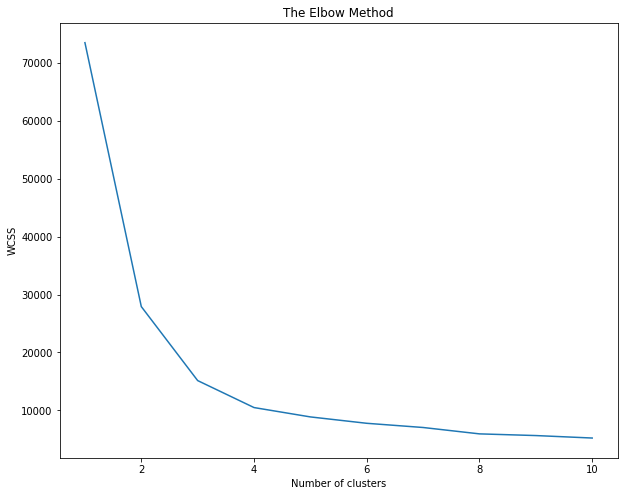

In [116]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_COP)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [141]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_COP)
centroids = kmeans.cluster_centers_

In [142]:
centroids

array([[4.96043217, 5.30349812, 3.64333787, 3.35581285],
       [5.16538609, 9.98618513, 3.66245531, 3.36498946],
       [4.96647908, 4.33351825, 3.64557657, 3.35849856],
       [7.91750115, 4.90870895, 3.64391205, 3.35907267]])

In [143]:
kmeans.score(df_COP)

-10491.743939432694